In [1]:
! pip install torch torchvision diffusers transformers accelerate
! pip install datasets huggingface_hub opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.1 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.93
  Attempting uninstall: nvidia-curand-cu12
    Found existing installation: nvidia-curand-cu12 10.3.9.90
    Uninstalling nvidia-curand-cu12-1

In [2]:
import cv2 as cv 
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
from datasets import load_dataset

ds = load_dataset("Chris1/cityscapes")

dataset_infos.json:   0%|          | 0.00/864 [00:00<?, ?B/s]

train-00000-of-00014.parquet:   0%|          | 0.00/487M [00:00<?, ?B/s]

train-00001-of-00014.parquet:   0%|          | 0.00/521M [00:00<?, ?B/s]

train-00002-of-00014.parquet:   0%|          | 0.00/503M [00:00<?, ?B/s]

train-00003-of-00014.parquet:   0%|          | 0.00/494M [00:00<?, ?B/s]

train-00004-of-00014.parquet:   0%|          | 0.00/475M [00:00<?, ?B/s]

train-00005-of-00014.parquet:   0%|          | 0.00/511M [00:00<?, ?B/s]

train-00006-of-00014.parquet:   0%|          | 0.00/529M [00:00<?, ?B/s]

train-00007-of-00014.parquet:   0%|          | 0.00/505M [00:00<?, ?B/s]

train-00008-of-00014.parquet:   0%|          | 0.00/494M [00:00<?, ?B/s]

train-00009-of-00014.parquet:   0%|          | 0.00/513M [00:00<?, ?B/s]

train-00010-of-00014.parquet:   0%|          | 0.00/512M [00:00<?, ?B/s]

train-00011-of-00014.parquet:   0%|          | 0.00/515M [00:00<?, ?B/s]

train-00012-of-00014.parquet:   0%|          | 0.00/517M [00:00<?, ?B/s]

train-00013-of-00014.parquet:   0%|          | 0.00/512M [00:00<?, ?B/s]

validation-00000-of-00003.parquet:   0%|          | 0.00/418M [00:00<?, ?B/s]

validation-00001-of-00003.parquet:   0%|          | 0.00/400M [00:00<?, ?B/s]

validation-00002-of-00003.parquet:   0%|          | 0.00/388M [00:00<?, ?B/s]

test-00000-of-00007.parquet:   0%|          | 0.00/472M [00:00<?, ?B/s]

test-00001-of-00007.parquet:   0%|          | 0.00/497M [00:00<?, ?B/s]

test-00002-of-00007.parquet:   0%|          | 0.00/503M [00:00<?, ?B/s]

test-00003-of-00007.parquet:   0%|          | 0.00/506M [00:00<?, ?B/s]

test-00004-of-00007.parquet:   0%|          | 0.00/501M [00:00<?, ?B/s]

test-00005-of-00007.parquet:   0%|          | 0.00/499M [00:00<?, ?B/s]

test-00006-of-00007.parquet:   0%|          | 0.00/495M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2975 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/500 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1525 [00:00<?, ? examples/s]

In [4]:
ds

DatasetDict({
    train: Dataset({
        features: ['image', 'semantic_segmentation'],
        num_rows: 2975
    })
    validation: Dataset({
        features: ['image', 'semantic_segmentation'],
        num_rows: 500
    })
    test: Dataset({
        features: ['image', 'semantic_segmentation'],
        num_rows: 1525
    })
})

1235
Image shape: (1024, 2048, 3)
Mask shape: (1024, 2048, 3)


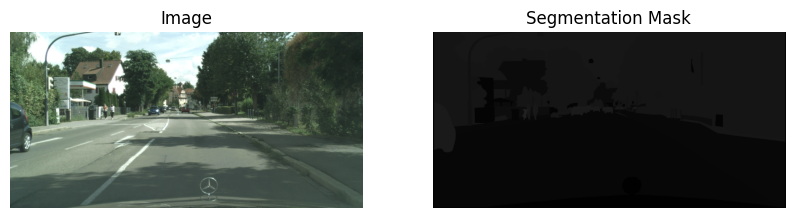

In [9]:
import random
import numpy as np
import matplotlib.pyplot as plt

def show_random_sample(dataset):
    idx = random.randint(0, len(dataset) - 1)
    print(idx)
    sample = dataset[2487]
    
    # Convert PIL Image to NumPy array
    image = np.array(sample["image"])  # shape: (H, W, 3)
    mask = np.array(sample["semantic_segmentation"])  # shape: (H, W)
    
    print("Image shape:", image.shape)
    print("Mask shape:", mask.shape)

    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap='tab20')  # Use a colormap for discrete labels
    plt.title("Segmentation Mask")
    plt.axis('off')
    
    plt.show()
show_random_sample(ds["train"])

In [6]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
from transformers import AutoProcessor
import torch
from PIL import Image

# Assumes input_image is a PIL Image (e.g., daylight scene)
controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    controlnet=controlnet,
    torch_dtype=torch.float16
).to("cuda")

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)

# Provide prompt to guide generation
prompt = "A city at night, photorealistic, high detail"

# Generate night version
output = pipe(prompt=prompt, image=ds['train'][2487]['image'], num_inference_steps=30)
styled_image = output.images[0]
styled_image.show()


2025-05-04 18:17:34.167854: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746382654.409241      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746382654.527053      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


config.json:   0%|          | 0.00/920 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

In [7]:
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)

# Provide prompt to guide generation
prompt = "A city at night, photorealistic, high detail"

# Generate night version
output = pipe(prompt=prompt, image=ds['train'][2487]['image'], num_inference_steps=30)
styled_image = output.images[0]
styled_image.show()

  0%|          | 0/30 [00:00<?, ?it/s]

(-0.5, 2047.5, 1023.5, -0.5)

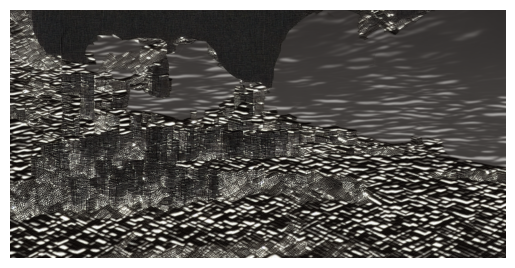

In [11]:
plt.imshow(styled_image)
# plt.show()
plt.axis('off')

In [12]:
from transformers import AutoFeatureExtractor, AutoModelForImageToImage
import torch

# Load model and feature extractor
extractor = AutoFeatureExtractor.from_pretrained("huggan/cyclegan-night2day")
model = AutoModelForImageToImage.from_pretrained("huggan/cyclegan-night2day").to("cuda")

# Convert image
inputs = extractor(images=ds['train'][2487]['image'], return_tensors="pt").to("cuda")
with torch.no_grad():
    outputs = model(**inputs)
output_tensor = outputs.predictions[0].cpu()
styled_image = extractor.post_process(output_tensor, output_type=Image.Image)[0]


OSError: huggan/cyclegan-night2day is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`

In [ ]:
plt.imshow(styled_image)
# plt.show()
plt.axis('off')